# Capacity Test

In [51]:
# Data Analysis
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Utilities
import numpy as np
# from tqdm import tnrange
import pickle
import os
from tqdm import tqdm_notebook as tqdmn
# import warnings

In [52]:
%config InlineBackend.figure_format = 'retina'

In [118]:
# nominal_rates_min = [1,2,3,4,5,6,7,8,9,10,15]
# rep = 2
# description = {}

# for rate_min in nominal_rates_min:
#     for i in np.arange(1,rep+1):
#         df = pd.read_csv('dataset/' + str(rate_min) + 'k_0' + str(i) + '.jtl')
#         descr_name = str(rate_min) + 'k_0' + str(i) 
#         description[descr_name] = df.elapsed.describe()

# description

In [125]:
nominal_rates_min = [1,2,3,4,5,6,7,8,9,10,15]
rep = 2
duration = 60

throughput = []
response_time = []
request_rate = []

description = {}

for rate_min in nominal_rates_min:
    
    request_rate_avg = []    
    response_time_avg = []
    throughput_avg = []
    
    for i in np.arange(1, rep+1):

        df = pd.read_csv('dataset/' + str(rate_min) + 'k_0' + str(i) + '.jtl')
        
        descr_name = str(rate_min) + 'k_0' + str(i)
        description[descr_name] = df.elapsed.describe()
        
        tot_req = df.shape[0]
        print('Total requests:', tot_req)

        nominal_rate = rate_min*1000/60
        print('Nominal request rate:', nominal_rate)

    #     duration = (df.timeStamp[df.shape[0]-1]-df.timeStamp[0])/1000
        actual_rate = tot_req/duration
        print('Actual request rate:', actual_rate)

        err = (df['success'] == False).sum()
        print('Errors:', err, '(' + str(err/tot_req*100) + ' %)')

        elaps = df.loc[df['success']==True, 'elapsed'].mean()
#         elaps = df.loc[df['success']==True, 'elapsed'].median()
        print('Avg elapsed time:', elaps)

        tp = (tot_req-err)/60       
        print('Throughput:', tp)

        print()
        
        request_rate_avg.append(actual_rate)
        response_time_avg.append(elaps)
        throughput_avg.append(tp)
    
    print('------------------------------------------')
    print()
        
    request_rate.append(nominal_rate)
#     request_rate.append(np.mean(request_rate_avg))
    response_time.append(np.mean(response_time_avg))
    throughput.append(np.mean(throughput_avg))


Total requests: 1084
Nominal request rate: 16.666666666666668
Actual request rate: 18.066666666666666
Errors: 2 (0.18450184501845018 %)
Avg elapsed time: 25.26709796672828
Throughput: 18.033333333333335

Total requests: 1085
Nominal request rate: 16.666666666666668
Actual request rate: 18.083333333333332
Errors: 5 (0.4608294930875576 %)
Avg elapsed time: 28.32777777777778
Throughput: 18.0

------------------------------------------


Total requests: 2074
Nominal request rate: 33.333333333333336
Actual request rate: 34.56666666666667
Errors: 0 (0.0 %)
Avg elapsed time: 15.967695274831245
Throughput: 34.56666666666667

Total requests: 2071
Nominal request rate: 33.333333333333336
Actual request rate: 34.516666666666666
Errors: 0 (0.0 %)
Avg elapsed time: 17.680347658136167
Throughput: 34.516666666666666

------------------------------------------


Total requests: 3064
Nominal request rate: 50.0
Actual request rate: 51.06666666666667
Errors: 0 (0.0 %)
Avg elapsed time: 15.99934725848564

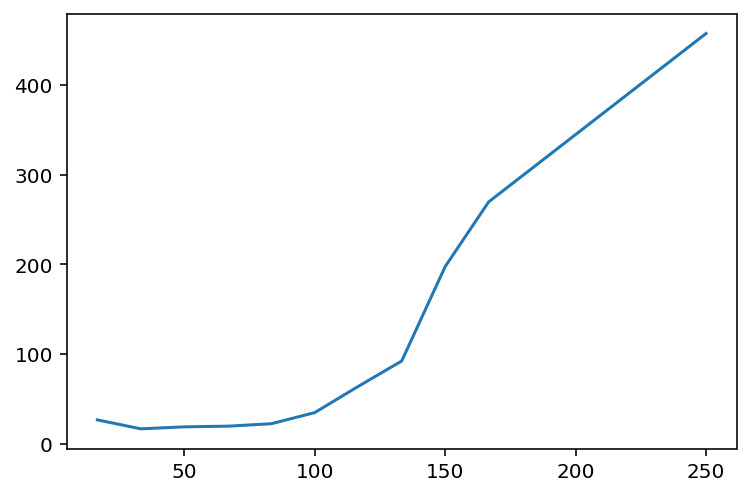

In [126]:
plt.plot(request_rate, response_time)

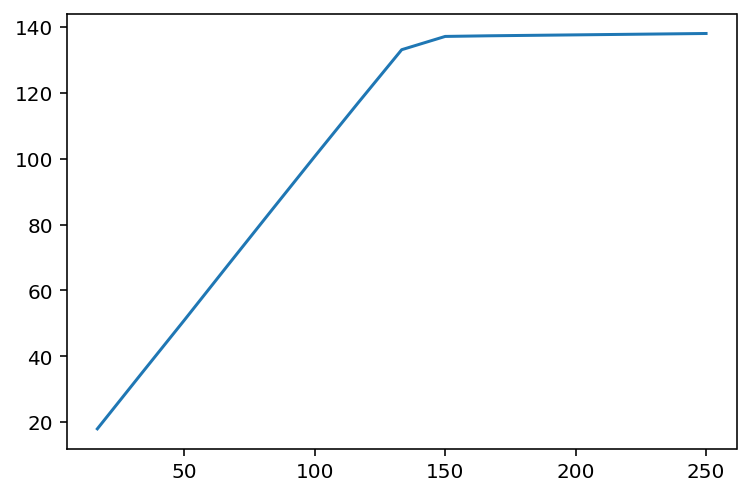

In [127]:
plt.plot(request_rate, throughput)

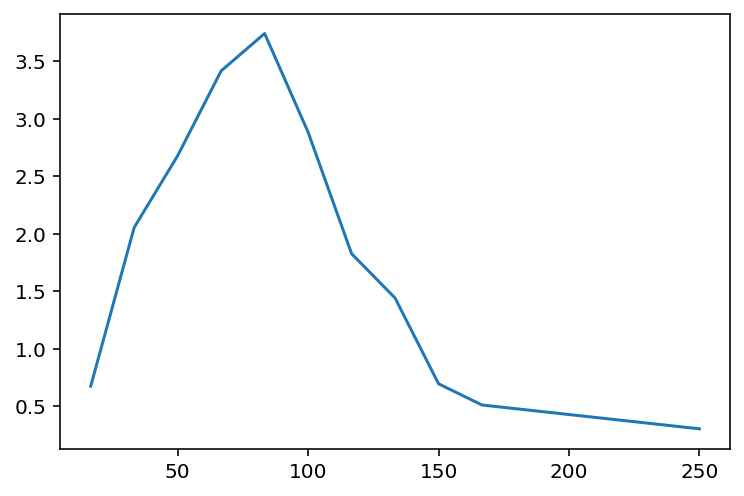

In [128]:
power = [throughput[i]/response_time[i] for i in range(len(throughput))]

plt.plot(request_rate, power)